In [9]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_data = train.copy()
test_data = test.copy()
train_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust5754,2015-02-07,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City1,Location 1484,7,1,YES,0,0,NO,53574,9263,9263,35048,33,619148,MALE,JD,tech-support,yachting,0,0,India,114875,144,1999-11-25,State2,100/300,566,1200.92,1056821,not-in-family,Vehicle22000,Jeep,Wrangler,2007,Y
1,Cust24283,2015-01-08,Single Vehicle Collision,Front Collision,Total Loss,Other,State4,City1,Location 1326,14,1,YES,0,2,?,101273,8687,16879,75707,51,432399,MALE,MD,priv-house-serv,polo,0,-12100,India,133404,347,1996-10-18,State1,500/1000,500,1463.65,8745941,other-relative,Vehicle30575,Jeep,E400,1997,N
2,Cust4525,2015-02-01,Multi-vehicle Collision,Side Collision,Major Damage,Other,State6,City5,Location 1318,6,3,?,0,2,YES,51886,9520,4760,37606,40,608228,MALE,MD,armed-forces,chess,0,0,India,113646,254,2011-07-17,State1,250/500,520,1382.22,0,husband,Vehicle37139,Dodge,RAM,2002,Y
3,Cust13581,2015-01-05,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State3,City6,Location 1482,15,1,?,1,3,YES,47774,6770,8686,32318,39,434206,MALE,Masters,exec-managerial,sleeping,0,-45300,India,122702,225,1991-11-18,State3,250/500,2000,1283.79,0,unmarried,Vehicle20970,Nissan,Maxima,2001,N
4,Cust11736,2015-01-11,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,State4,City4,Location 1172,17,2,YES,0,2,?,67667,5410,12303,49954,39,469856,FEMALE,Associate,protective-serv,polo,35300,0,India,120857,232,2003-08-11,State2,100/300,500,1502.69,8048023,husband,Vehicle11408,Honda,Escape,2009,Y


In [2]:
print(train_data['ReportedFraud'].value_counts(normalize=True))

N    0.730013
Y    0.269987
Name: ReportedFraud, dtype: float64


Axes(0.125,0.11;0.62x0.77)


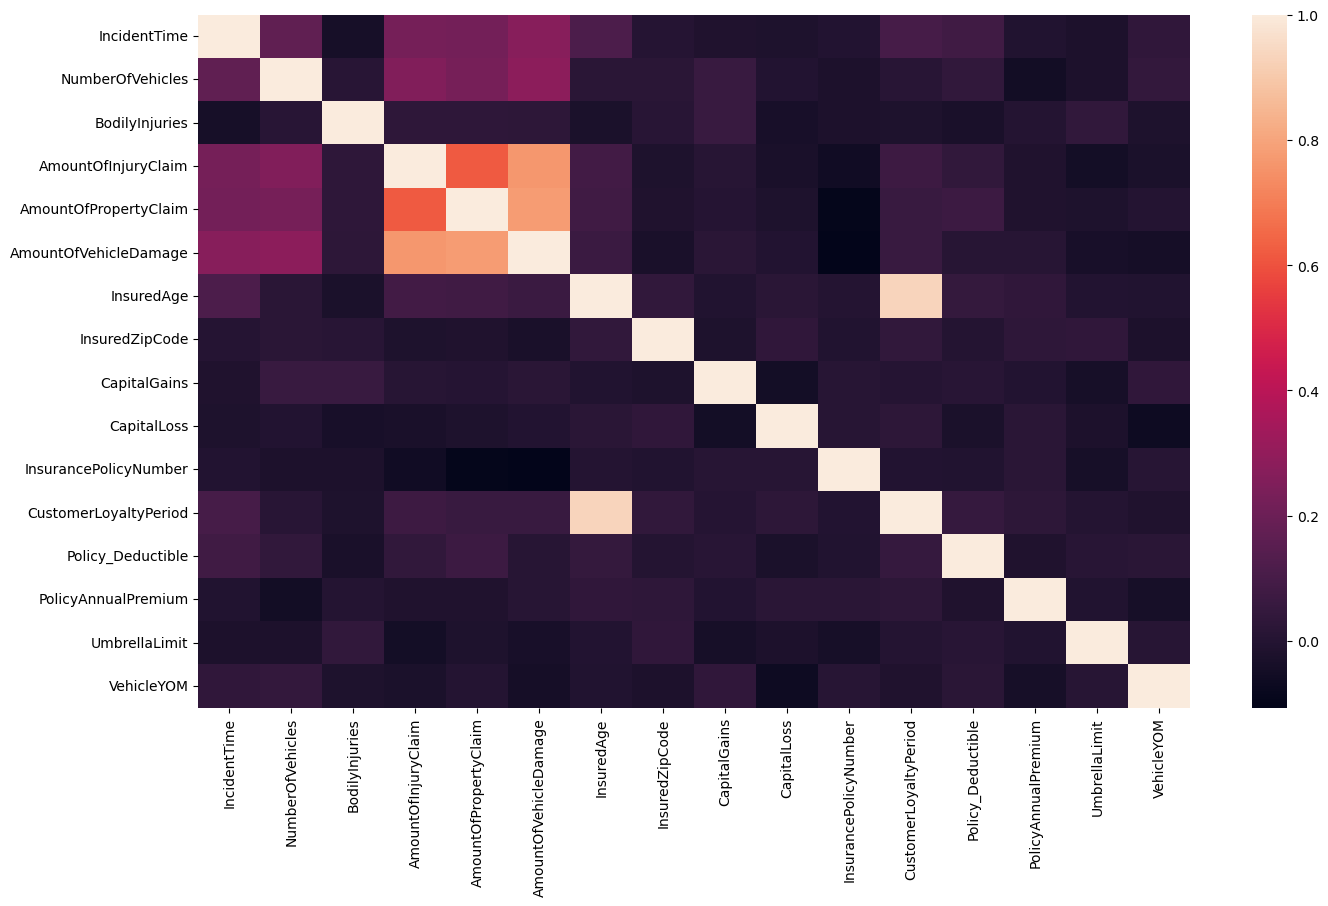

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
print(sns.heatmap(train_data.corr()))

In [7]:
pd.DataFrame(train_data.corr()).reset_index()

,index,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
0,IncidentTime,1.000000,0.169831,-0.041441,0.226126,0.217898,0.269770,0.117845,0.001746,-0.013716,-0.017595,-0.004240,0.097119,0.080455,-0.008465,-0.024167,0.036011
1,NumberOfVehicles,0.169831,1.000000,0.013440,0.252893,0.227368,0.284523,0.017155,0.016946,0.060504,-0.004648,-0.022673,0.011635,0.038019,-0.053377,-0.022337,0.044057
2,BodilyInjuries,-0.041441,0.013440,1.000000,0.028618,0.030775,0.023424,-0.026379,0.013389,0.059511,-0.033931,-0.021203,-0.019506,-0.032424,-0.001780,0.038903,-0.017393
3,AmountOfInjuryClaim,0.226126,0.252893,0.028618,1.000000,0.618886,0.762369,0.084260,-0.019398,0.008686,-0.030436,-0.054756,0.072259,0.038806,-0.013289,-0.049548,-0.024585
4,AmountOfPropertyClaim,0.217898,0.227368,0.030775,0.618886,1.000000,0.778263,0.080209,-0.011464,0.003742,-0.016229,-0.095045,0.058351,0.069274,-0.011774,-0.015826,-0.001252
5,AmountOfVehicleDamage,0.269770,0.284523,0.023424,0.762369,0.778263,1.000000,0.063807,-0.032369,0.015081,-0.006410,-0.106513,0.061787,0.008849,0.007243,-0.036782,-0.042682
6,InsuredAge,0.117845,0.017155,-0.026379,0.084260,0.080209,0.063807,1.000000,0.040173,-0.010332,0.018089,-0.000249,0.932652,0.048745,0.034049,-0.002947,-0.009689
7,InsuredZipCode,0.001746,0.016946,0.013389,-0.019398,-0.011464,-0.032369,0.040173,1.000000,-0.016531,0.033197,-0.010641,0.038945,0.001043,0.030868,0.032125,-0.023363
8,CapitalGains,-0.013716,0.060504,0.059511,0.008686,0.003742,0.015081,-0.010332,-0.016531,1.000000,-0.049695,0.007448,0.002059,0.014066,-0.004433,-0.037382,0.033036
9,CapitalLoss,-0.017595,-0.004648,-0.033931,-0.030436,-0.016229,-0.006410,0.018089,0.033197,-0.049695,1.000000,0.006275,0.023538,-0.027960,0.015623,-0.021710,-0.066215


In [10]:
train_data.drop('AmountOfTotalClaim',axis=1,inplace=True)
train_data.drop('InsuredAge',axis=1,inplace=True)

test_data.drop('AmountOfTotalClaim',axis=1,inplace=True)
test_data.drop('InsuredAge',axis=1,inplace=True)

In [ ]:
train_data = train_data.drop(['VehicleID', 'IncidentAddress', 'Country', 'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Country', 'DateOfIncident'],axis=1)
print(train_data.shape)

test_data = test_data.drop(['VehicleID', 'IncidentAddress', 'Country', 'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Country', 'DateOfIncident'],axis=1)
print(test_data.shape)

train_data = train_data.replace(['?','???','-1','-5','MISSINGVALUE','mode'], np.nan)
test_data = test_data.replace(['?','???','-1','-5','MISSINGVALUE','mode'], np.nan)

print(train_data.isna().sum())
print(test_data.isna().sum())

train_data['InsuredGender'].fillna('FEMALE',inplace=True)
test_data['InsuredGender'].fillna('FEMALE',inplace=True)

#from sklearn.impute import KNNImputer
#knn = KNNImputer(n_neighbors=5)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

train_data['PropertyDamage'] = train_data['PropertyDamage'].map({'YES': 1, 'NO': 0})
train_data['PoliceReport'] = train_data['PoliceReport'].map({'YES': 1, 'NO': 0})
train_data['TypeOfCollission'] = train_data['TypeOfCollission'].map({'Side Collision':1, 'Rear Collision':2, 'Front Collision':3})

test_data['PropertyDamage'] = test_data['PropertyDamage'].map({'YES': 1, 'NO': 0})
test_data['PoliceReport'] = test_data['PoliceReport'].map({'YES': 1, 'NO': 0})
test_data['TypeOfCollission'] = test_data['TypeOfCollission'].map({'Side Collision':1, 'Rear Collision':2, 'Front Collision':3})

#train data imputer
pd = train_data[['PropertyDamage']].copy()
pd_updated = imputer.fit_transform(pd)
train_data['PropertyDamage'] = pd_updated

pr = train_data[['PoliceReport']].copy()
pr_updated = imputer.fit_transform(pr)
train_data['PoliceReport'] = pr_updated

tc = train_data[['TypeOfCollission']].copy()
tc_updated = imputer.fit_transform(tc)
train_data['TypeOfCollission'] = tc_updated

witness = train_data[['Witnesses']].copy()
witness_updated = imputer.fit_transform(witness)
train_data['Witnesses'] = witness_updated

#test data imputer
pd = test_data[['PropertyDamage']].copy()
pd_updated = imputer.fit_transform(pd)
test_data['PropertyDamage'] = pd_updated

pr = test_data[['PoliceReport']].copy()
pr_updated = imputer.fit_transform(pr)
test_data['PoliceReport'] = pr_updated

tc = test_data[['TypeOfCollission']].copy()
tc_updated = imputer.fit_transform(tc)
test_data['TypeOfCollission'] = tc_updated

witness = test_data[['Witnesses']].copy()
witness_updated = imputer.fit_transform(witness)
test_data['Witnesses'] = witness_updated

print(train_data.isnull().sum())
print(test_data.isnull().sum())

train_data = train_data.dropna(0)
test_data = test_data.fillna(test_data.mode().iloc[0])

train_data.drop('CustomerID',axis=1,inplace=True)
test_data.drop('CustomerID',axis=1,inplace=True)

x_train = train_data.drop('ReportedFraud',axis=1)
y_train = train_data['ReportedFraud']

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

cat_col = list(train_data.select_dtypes(include='object').columns)
print(cat_col)

x_train['ReportedFraud'] = y_train

for i in cat_col:
    x_train[i] = label.fit_transform(x_train[i])

x_test = test_data.copy()
test_cat_cols = list(x_test.select_dtypes(include='object').columns)
print(test_cat_cols)
for i in (test_cat_cols):
    x_test[i] = label.fit_transform(x_test[i])
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = x_train.drop('ReportedFraud',axis=1).columns
x_train[cols] = scaler.fit_transform(x_train[cols])
print(x_train.head())

import pandas as pd 
col = x_test.columns
x_test = pd.DataFrame(scaler.transform(x_test), columns=col)
print(x_test.head())

y_train = x_train['ReportedFraud']
x_train = x_train.drop('ReportedFraud',axis=1)

from sklearn.metrics import classification_report, f1_score, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train,y_train)

y_pred_gbc = gbc.predict(x_test)

print('Train Accuracy: {}%'.format(round(gbc.score(x_train, y_train)*100,2)))

pred = []

for i in y_pred_gbc:
    if i==0:
        pred.append('N')
    else:
        pred.append('Y')

print(y_pred_gbc[:6])
print(pred[:6])

pred = pd.DataFrame(pred, columns=['ReportedFraud'])


In [ ]:
sample_predcitions = pd.read_csv('test.csv')
sample_predcitions['ReportedFraud'] = pred
print(sample_predcitions.shape)
sample_predcitions.head()

In [ ]:
sample_predcitions = sample_predcitions[['CustomerID','ReportedFraud']]
print(sample_predcitions.shape)
sample_predcitions

In [ ]:
sample_predcitions.to_csv('output.csv',index=False)